# Optimizing the server routine without communication

I am optimizing the server routine without communication.

The benchmarks are run on different number of cores. The limit of the cores is handled by docker. The number of workers is equal to the number of processors.

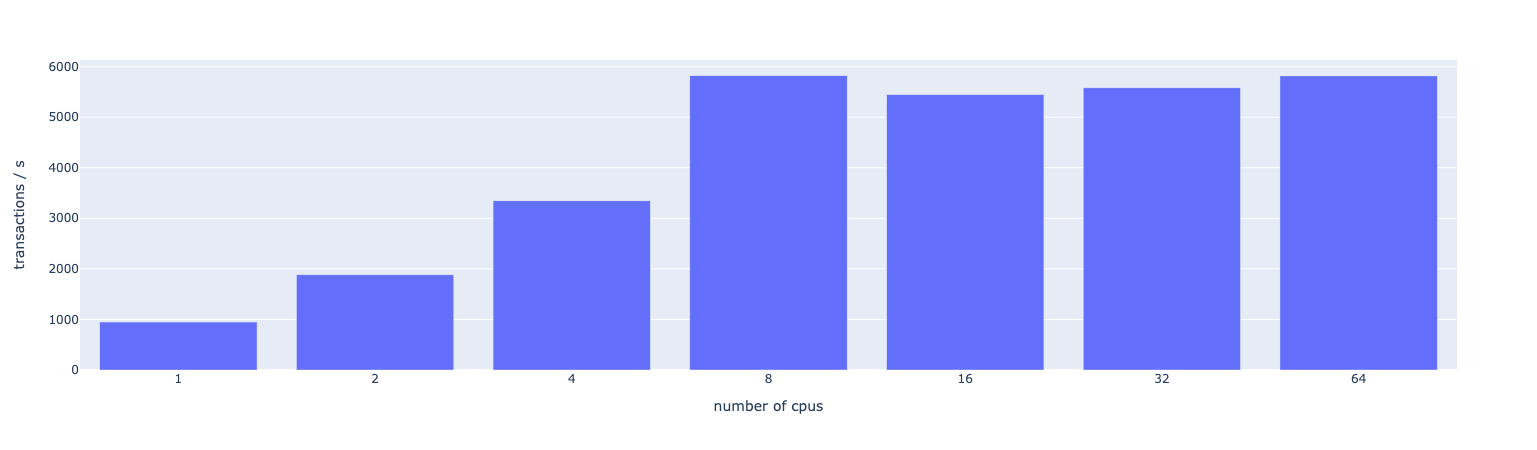

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

d1 = pd.read_csv("server-routine/data.csv")

fig = px.bar(x=d1["cpus"], y=1/(d1["nsop"]*10**-9))
fig.update_layout(xaxis_type='category')
fig.update_yaxes(title_text="transactions / s")
fig.update_xaxes(title_text="number of cpus")

fig.show()

That means that the server routine does not scale properly.

## Analysing the bottleneck!

Server: 64-core general purpose AWS linux server.

### Block profiling

Using 1 core: `aws64-1core-block.svg`

Using 64 cores: `aws64-64cores-block.svg`

### Result

We can see that my hash function is very inefficient. In my hash function I first print the struct (to a string), then hash the string. There must be a more efficient way.